In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
dataset=pd.read_excel('Data/tb-by-place-of-birth-age-sex-and-race-ethnicity.xlsx')

In [ ]:
dataset.head()

,Year,Category,Strata,Cases,Population,"Rate per 100,000 population"
0,2005,Total,All cases,2897,35985582,8.1
1,2006,Total,All cases,2776,36246822,7.7
2,2007,Total,All cases,2722,36552529,7.4
3,2008,Total,All cases,2695,36856222,7.3
4,2009,Total,All cases,2466,37077204,6.7


In [ ]:
dataset_lhj=pd.read_excel("Data/tb-in-local-health-jurisdiction.xlsx")

In [ ]:
dataset_lhj

,year,jurisdiction,cases,population,rate
0,2005,California,2897,35985582,8.1
1,2005,Alameda,153,1354209,11.3
2,2005,Alpine,0,1208,.
3,2005,Amador,0,37722,.
4,2005,Berkeley,10,105673,9.5
...,...,...,...,...,...
925,2019,Tulare,12,479924,2.5
926,2019,Tuolumne,1,52568,.
927,2019,Ventura,27,853747,3.2
928,2019,Yolo,9,222868,4


# cleaning data (from question 02)

### DATASET 01 (age, sex, race, origin)

In [ ]:
dataset['Cases']=dataset['Cases'].replace('.', 0).astype(int).fillna(0)
dataset['Population']=dataset['Population'].replace('.', 0).astype(float).fillna(0)
dataset['Rate per 100,000 population']=dataset['Rate per 100,000 population'].replace('.', 0).astype(float).fillna(0)

In [ ]:
dataset.describe()

,Year,Cases,Population,"Rate per 100,000 population"
count,294.000000,294.000000,2.940000e+02,294.000000
mean,2011.948980,597.517007,9.707497e+06,6.190816
std,4.345267,666.768923,1.002097e+07,6.154769
min,2005.000000,0.000000,0.000000e+00,0.000000
25%,2008.000000,32.000000,2.217894e+06,1.200000
50%,2012.000000,384.500000,5.773050e+06,5.000000
75%,2016.000000,888.750000,1.503138e+07,8.100000
max,2019.000000,2897.000000,3.995910e+07,29.000000


## Grouping data by different category

In [ ]:
## creating new dataframe of each category
tb_by_age=dataset.groupby(['Category']).get_group('Age group')
tb_by_sex=dataset.groupby(['Category']).get_group('Sex')
tb_by_race=dataset.groupby(['Category']).get_group('Race/ethnicity')
tb_by_origin=dataset.groupby(['Category']).get_group('Origin')
tb_total=dataset.groupby(['Category']).get_group('Total')

In [ ]:
## droping category and renaming strata
tb_by_age=tb_by_age.drop(['Category'], axis=1).rename(columns={"Strata": "age"})
tb_by_sex=tb_by_sex.drop(['Category'], axis=1).rename(columns={"Strata": "sex"})
tb_by_race=tb_by_race.drop(['Category'], axis=1).rename(columns={"Strata": "race"})
tb_by_origin=tb_by_origin.drop(['Category'], axis=1).rename(columns={"Strata": "origin"})
tb_total=tb_total.drop(['Category'], axis=1).drop(['Strata'], axis=1)
tb_by_origin.dtypes

Year                             int64
origin                          object
Cases                            int64
Population                     float64
Rate per 100,000 population    float64
dtype: object

### DATASET 02 (local health durisdiction)

In [ ]:
dataset_lhj['rate']=dataset_lhj['rate'].replace('.', 0).astype(float).fillna(0)
dataset_lhj.dtypes

year              int64
jurisdiction     object
cases             int64
population        int64
rate            float64
dtype: object

with this we have cleaned all of our data and removed the targeted anomalies

# Finding Relation

In [ ]:
tb_by_sex.corr(method ='pearson') 

,Year,Cases,Population,"Rate per 100,000 population"
Year,1.000000,-0.293625,0.305519,-0.387071
Cases,-0.293625,1.000000,0.494791,0.994604
Population,0.305519,0.494791,1.000000,0.444525
"Rate per 100,000 population",-0.387071,0.994604,0.444525,1.000000


### Ques1: Relationship between Race and number of TB cases

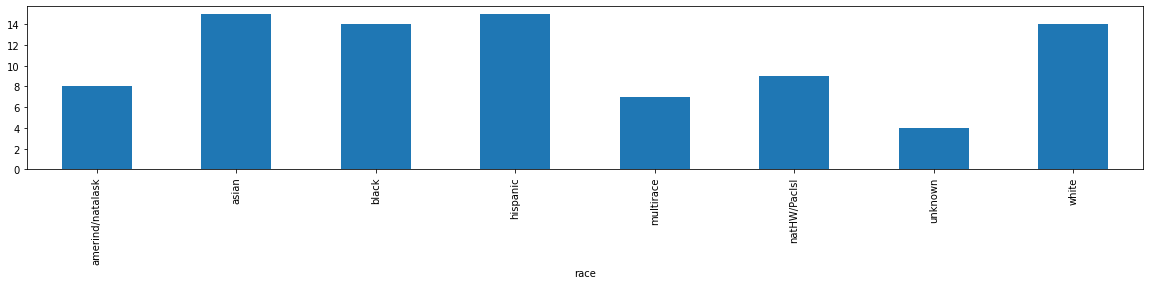

In [ ]:
tb_by_race.groupby('race')['Cases'].nunique().plot(kind='bar')
plt.show()

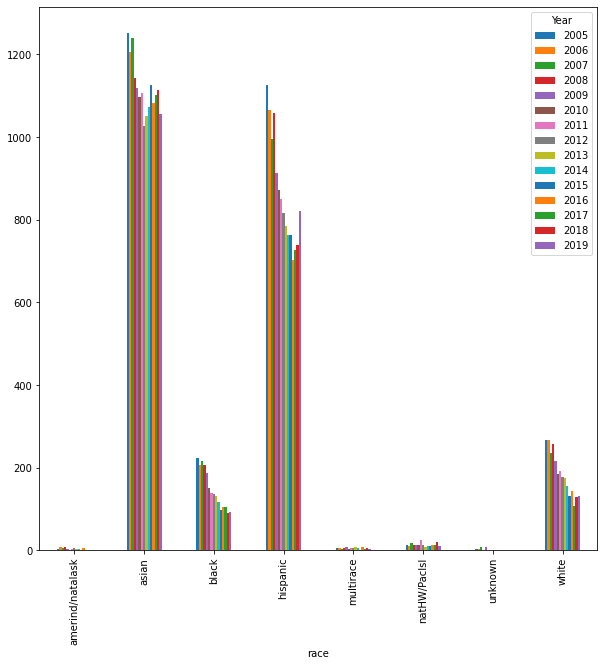

In [ ]:
ax = tb_by_race.pivot('race', 'Year','Cases').plot.bar(figsize=(10,10))

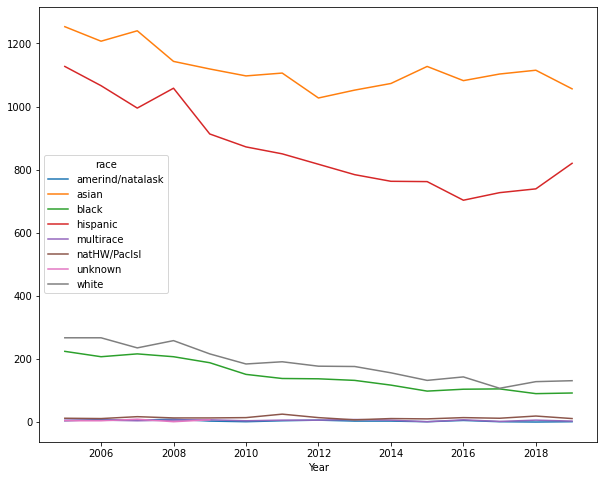

In [ ]:
tb_by_race.pivot_table( 'Cases', ['Year'], 'race').plot(figsize=(10,8))

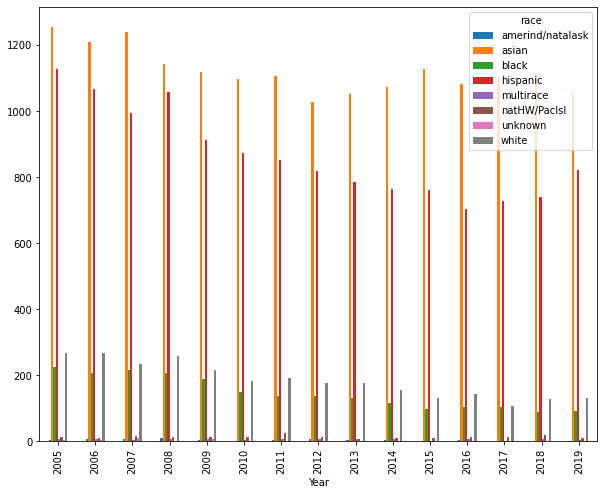

In [ ]:
tb_by_race.pivot_table( 'Cases', ['Year'], 'race').plot(kind='bar',figsize=(10,8))

In [ ]:
tb_by_race.groupby('race').Cases.sum()

race
amerind/natalask       55
asian               16800
black                2206
hispanic            12996
multirace              78
natHW/PacIsl          203
unknown                28
white                2768
Name: Cases, dtype: int64

In [ ]:
pd.pivot_table(tb_by_race,index=["race"],aggfunc=[np.sum,np.mean])

sum               ...                        mean        
                  Cases   Population  ... Rate per 100,000 population    Year
race                                  ...                                    
amerind/natalask     55    2682894.0  ...                    1.313333  2012.0
asian             16800   77228889.0  ...                   22.126667  2012.0
black              2206   34143537.0  ...                    6.513333  2012.0
hispanic          12996  214613301.0  ...                    6.140000  2012.0
multirace            78   12899212.0  ...                    0.500000  2012.0
natHW/PacIsl        203    1983736.0  ...                   10.240000  2012.0
unknown              28          0.0  ...                    0.000000  2010.5
white              2768  227249226.0  ...                    1.220000  2012.0

[8 rows x 8 columns]

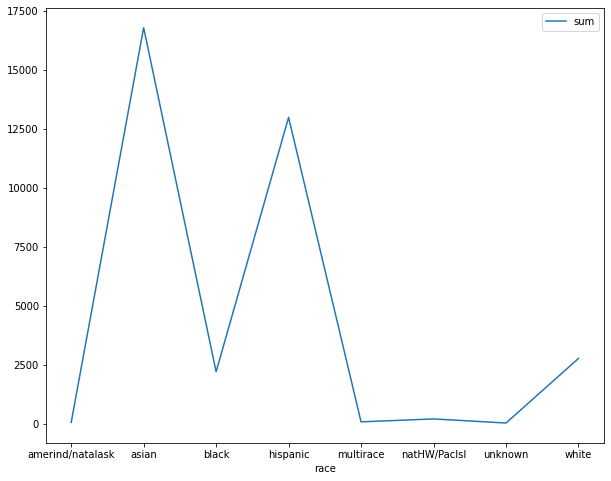

In [ ]:
##sorting it to reate a correlation
race_sum=tb_by_race.groupby('race')['Cases'].agg(['sum','count'])
flattened = pd.DataFrame(race_sum.to_records())
flattened.plot(x='race', y='sum',figsize=(10,8))

In [ ]:
flattened.sort_values(by=['sum'], inplace=True)


In [ ]:
flattened

,race,sum,count
6,unknown,28,8
0,amerind/natalask,55,15
4,multirace,78,15
5,natHW/PacIsl,203,15
2,black,2206,15
7,white,2768,15
3,hispanic,12996,15
1,asian,16800,15


In [ ]:
## using pearson's correlation, a strong relation is found
from scipy.stats import chisquare

z=flattened.apply(lambda x : pd.factorize(x)[0])+1
z['race'].corr(flattened['sum'])


0.8429211312030721